## Analysis of the quantization model

In [20]:
import torch
import numpy as np
model_path = "/home/qhy/Reserach/AICAS/quantization/qmodel-pot/775/775-qot.pth"
params = torch.load(model_path)
for k in params.keys():
    if 'gap' in k:
        print(k)
        # print(np.log2(params[k].detach().cpu().numpy()))

gap_post_act_fake_quantizer.fake_quant_enabled
gap_post_act_fake_quantizer.observer_enabled
gap_post_act_fake_quantizer.scale
gap_post_act_fake_quantizer.zero_point
gap_post_act_fake_quantizer.eps
gap_post_act_fake_quantizer.activation_post_process.eps
gap_post_act_fake_quantizer.activation_post_process.min_val
gap_post_act_fake_quantizer.activation_post_process.max_val


In [12]:
params["linear.bias"].shape

torch.Size([10])

In [14]:
import sys
sys.path.append('../encode+decode/')
from encode import encode
import yaml
from easydict import EasyDict
config_path = "/home/qhy/Reserach/AICAS/config/cifar10/755-stage-2_1_6_7_3-ratio-0.75_0.75_0.5_0.125_1.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-pool-False_True_True_True_True_True-pool_type-None_avgpool_maxpool_maxpool_maxpool_avgpool-cifar10.yaml"
config = EasyDict(yaml.full_load(open(config_path)))
code = encode(755,config)

In [15]:
code

[0.75, 0.75, 0.5, 0.125, 1.0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 6, 7, 3]

[1327104.0, 21233664.0, 12288.0, 21233664.0, 4096.0, 9437184.0, 9437184.0, 9437184.0, 9437184.0, 9437184.0, 9437184.0, 512.0, 589824.0, 589824.0, 589824.0, 589824.0, 589824.0, 589824.0, 589824.0, 2048.0, 37748736.0, 37748736.0, 37748736.0, 128.0, 5120.0]
[1344.0, 20784.0, 20784.0, 36928.0, 36928.0, 36928.0, 36928.0, 36928.0, 36928.0, 9248.0, 9248.0, 9248.0, 9248.0, 9248.0, 9248.0, 9248.0, 2359808.0, 2359808.0, 2359808.0, 5120.0]
217.816704 7.41376


In [24]:
# 62.1|5.2
channel_num

array([ 48.,  48.,  64.,  32., 512.])

In [29]:
(sum(params_list)*4)/1024/1024

28.28125

In [28]:
45*5

225

## Anaylise the accuracy after quantization with pot

In [35]:
import numpy as np
import matplotlib.pyplot as plt
acc_int8_pot = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8_742-989-pot.npy",allow_pickle=True).item()
acc_int8 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8_742.npy",allow_pickle=True).item()
acc_f32 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_32_742-989-pot.npy",allow_pickle=True).item()


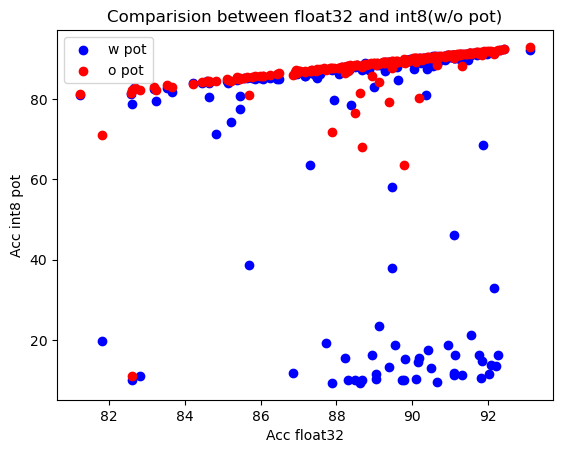

In [39]:
acc_pot = []
acc_full = []
acc_i8 = []
for k in acc_int8_pot.keys():
    acc_pot.append(acc_int8_pot[k])
    acc_full.append(acc_f32[k])
    acc_i8.append(acc_int8[k])
plt.scatter(acc_full,acc_pot,label="w pot",c="blue")
plt.scatter(acc_full,acc_i8,label="o pot",c="red")
plt.xlabel("Acc float32")
plt.ylabel("Acc int8 pot")
plt.title("Comparision between float32 and int8(w/o pot)")
plt.legend()
plt.show()